# Curvas de aprendizaje

En esta libreta vamos a revisar las curvas de aprendizaje para dos clasificadores diferentes (Naive Bayes y SVM lineal) para el clasico conjunto de clasificación de dígitos escritos a mano. Basado en [este ejemplo](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html) de la documentación de Scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Los clasificadores
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Los datos
from sklearn.datasets import load_digits

# Para hacer curvas de aprendizaje
from sklearn.model_selection import learning_curve

# Para hacer curvas de validación
from sklearn.model_selection import validation_curve

plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')
%matplotlib inline


## 1. Vamos a ver ejemplos del conjunto de datos

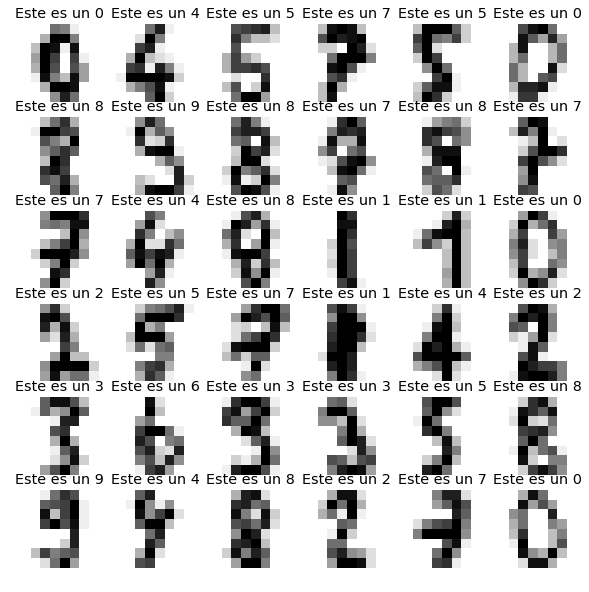

In [2]:
digits = load_digits()
X, y = digits.data, digits.target

ids = np.random.randint(0, y.shape[0], 36)
figure = plt.figure(figsize=(10, 10))
for index, (image, label) in enumerate(zip(digits.images[ids], digits.target[ids])):
    plt.subplot(6, 6, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Este es un %i' % label)


## 2. Vamos a guardar una función para hacer las curvas de aprendizaje

In [4]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10, 10))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    ####################################################################
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, 
        X, y, 
        cv=cv, 
        n_jobs=n_jobs, 
        train_sizes=train_sizes
    )
    ####################################################################
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(
        train_sizes, 
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std, 
        alpha=0.1,
        color="r"
    )
    plt.fill_between(
        train_sizes, 
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std, 
        alpha=0.1, 
        color="g"
    )
    plt.plot(
        train_sizes, 
        train_scores_mean, 
        'o-', 
        color="r",
        label="Training score"
    )
    plt.plot(
        train_sizes, 
        test_scores_mean, 
        'o-', 
        color="g",
        label="Cross-validation score"
    )
    plt.legend(loc='lower right')
    return plt



## 3. Aplica las curvas de aprendizaje con Naive bayes

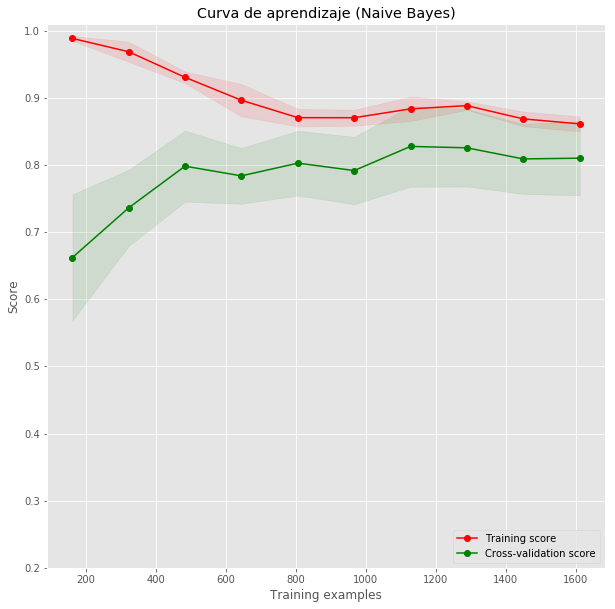

In [6]:
# Validación cruzada con 100 folders (20 por ciento de datos de validación)
clf = GaussianNB()
plt = plot_learning_curve(
    clf, 
    "Curva de aprendizaje (Naive Bayes)", 
    X, 
    y, 
    ylim=(0.2, 1.01), 
    cv=10, 
    n_jobs=4
)

## 4. Curvas de aprendizaje con la máquina de vectores de soporte

<module 'matplotlib.pyplot' from 'C:\\Users\\braya\\Anaconda2\\lib\\site-packages\\matplotlib\\pyplot.py'>

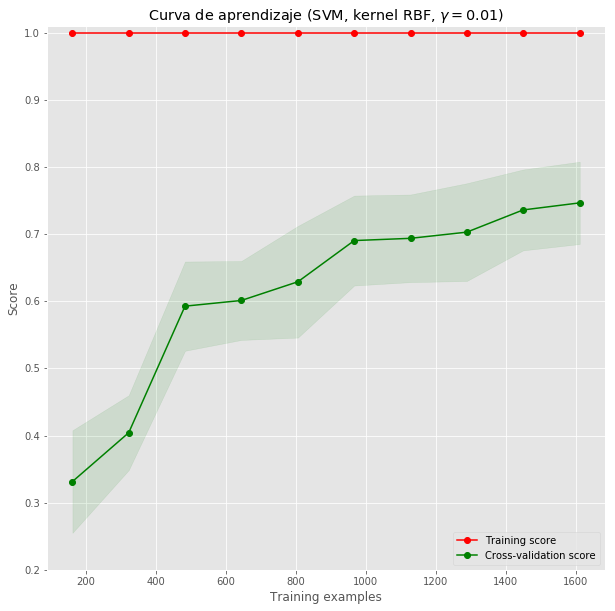

In [5]:
# Validación cruzada de 10 folders
clf = SVC(gamma=0.01)
plot_learning_curve(
    clf, 
    "Curva de aprendizaje (SVM, kernel RBF, $\gamma=0.01$)", 
    X, 
    y, 
    (0.2, 1.01), 
    cv=10, 
    n_jobs=4
)


## 5. Y ahora vemos que pasa conforme variamos $\gamma$ en nuestra SVM

(0.0, 1.1)

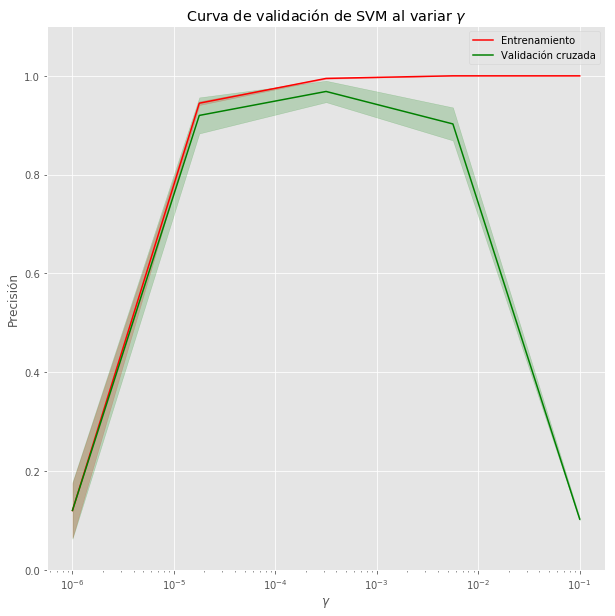

In [7]:

# Los valores que le vamos a dar a \gamma
param_range = np.logspace(-6, -1, 5)

# La curva de validación con 10 fold-cross-validation
train_scores, test_scores = validation_curve(
    SVC(), 
    X, 
    y, 
    param_name="gamma", 
    param_range=param_range,
    cv=10, 
    scoring="accuracy", 
    n_jobs=1
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 10))


# Grafica los resultados de entrenamiento
plt.semilogx(
    param_range, 
    train_scores_mean, 
    label="Entrenamiento", 
    color="r"
)
plt.fill_between(
    param_range, 
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, 
    alpha=0.2, 
    color="r"
)

# Grafica los resultados de validación
plt.semilogx(
    param_range, 
    test_scores_mean, 
    label=u"Validación cruzada", 
    color="g"
)
plt.fill_between(
    param_range, 
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std, 
    alpha=0.2, 
    color="g"
)

plt.title(u"Curva de validación de SVM al variar $\gamma$")
plt.xlabel("$\gamma$")
plt.ylabel(u"Precisión")
plt.legend(loc="best")
plt.ylim(0.0, 1.1)